# Data Quality for Company X

After analysing the given database, following questions are addressed:
- **Are the costs in the 'api_adwords_costs' table fully covered in the 'session_sources' table? Any campaigns where you see issues?**

So in the analysis of costs per click, it was found that there are lot of missing data. Some of the campaigns are generating revenue but there is no information about their cost per clicks from the third party sources. Moreover, except the missing data campaigns,there are  35 campaigns from which 99% revenue could be collected. Furthermore,  2 campaigns are underperforming  **campaign_id_79 and campaign_id_94**. Although, there are some sessions which are happening in these campaigns but users are not clicking on them.

- **Are the conversions in the 'conversions' table stable over time? Any pattern?**

The conversions are not stable over time. The conversion was highest on 30th of July, and lowest on 24th July. It is noted that on **Fridays and Sundays**, conversion is more than on saturday. Also, on 30th and 18th of July, it was Friday and Sunday and on 24th Saturday.

- **Double check conversions ('conversions' table) with backend ('conversions_backend' table), any issues?**

As conversions at the backend are true, there are some issues with the conversions at front:
 1. There are 345 missing conversions in the coversions_frontend table.
 2. 32 conversions are tracked twice but with different user_id.
 3. The total revenue generated in both the conversion table has a difference of around **30,000 euros**.


- **Are attribution results consistent? Do you find any conversions where the 'ihc' values don't make sense?**

Given that ihc values should be 1 for each conversion id, but seems like  most of the ihc values are not equal to 1. 


- **(Bonus) Do we have an issue with channeling? Are the number of sessions per channel stable over time?**

Content Marketing and Display marketing are the worse channels of all, there are negligible sessions on these channels. Moreover, SEO, Direct, Shopping - Non-branded, Social - Paid, Email are the top 5 channels for running the campaigns. Furthermore, it was noted that several channels such as **Video marketing, Google remarketing, YouTube Ads, Shopping Brand, Influencers, Referal, Social organic, Affiliates, Social Remarketing, SEA and Direct** had more traffic between 9th July and 13 July. In addition, the trend is somehow decreasing in these channels (except Direct and SEA-Brand) at the end of the month. However, the traffic is increasing on **E-mail and SEO** channels at the end of the month. Therefore, the traffi is not constant on the channels over a period of time.


- **(Bonus) Any other issues?**

There are **27 conversions** ( 27 from backend conversions and 197 from conversion frontend) where **revenue generated is 0**.
However, this could be possible because of the following reason:

1. There is a coupon or discount code which is applied at the checkout.
2. The price of some items are free (like some free e-books, free-trials etc).

As we have not enough information about the products sold by Company X, we can not derive any conclusion but assume that there is an issue in the data.

Moreover, if the conversions at the backend are true and we have same conversion ids in both conversion tables(some missing values in conversion_front), then the number of conversion_id with the 0 revenue generated would be the same. However, the conversion at frontend has not properly tracked the revenue and there is a difference of 170 untracked ids. 



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")

In [2]:
#eatablishing conection between database and python
sqliteConnection = sqlite3.connect('challenge.db')

In [3]:
cursor = sqliteConnection.cursor()

In [4]:
#query='''select * from session_sources'''
data = cursor.execute('''SELECT * FROM session_sources''')
session_sources = pd.DataFrame(data.fetchall())


In [5]:
names= [description[0] for description in data.description]

In [6]:
names

['session_id',
 'user_id',
 'event_date',
 'event_time',
 'channel_name',
 'campaign_name',
 'campaign_id',
 'market',
 'cpc']

In [7]:
session_sources.columns=names

In [8]:
session_sources.head()

,session_id,user_id,event_date,event_time,channel_name,campaign_name,campaign_id,market,cpc
0,session_id_660241,user_id_814496,2021-07-03,05:30:20,Affiliate,campaign_name_716,notset,NL,0.018
1,session_id_9812,user_id_752875,2021-07-19,16:00:40,Affiliate,campaign_name_108,notset,FR,0.000
2,session_id_780253,user_id_156905,2021-07-31,07:50:23,Affiliate,campaign_name_741,notset,DE,0.022
3,session_id_785994,user_id_540849,2021-07-16,09:43:00,Affiliate,campaign_name_741,notset,DE,0.000
4,session_id_1240841,user_id_275214,2021-07-12,08:36:41,Affiliate,campaign_name_893,notset,NL,0.188


In [9]:
# creating function to fetch all tables into dataframe

def reading_tables(database_name,table_name):
    sqliteConnection = sqlite3.connect(f'{database_name}')
    cursor = sqliteConnection.cursor()
    data = cursor.execute(f'''SELECT * FROM {table_name}''')
    table = pd.DataFrame(data.fetchall())
    names= [description[0] for description in data.description]
    table.columns=names
    return(table)   

In [10]:
# reading all the tables
session_sources = reading_tables("challenge.db", "session_sources")
api_word_cost = reading_tables("challenge.db", "api_adwords_costs")
attri_jour = reading_tables("challenge.db", "attribution_customer_journey")
conv_back = reading_tables("challenge.db", "conversions_backend")
conversions = reading_tables("challenge.db", "conversions")

# Data Exploratory analysis

In [11]:
session_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616702 entries, 0 to 1616701
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   session_id     1616702 non-null  object 
 1   user_id        1616702 non-null  object 
 2   event_date     1616702 non-null  object 
 3   event_time     1616702 non-null  object 
 4   channel_name   1616702 non-null  object 
 5   campaign_name  1616702 non-null  object 
 6   campaign_id    1616702 non-null  object 
 7   market         1616702 non-null  object 
 8   cpc            1616702 non-null  float64
dtypes: float64(1), object(8)
memory usage: 111.0+ MB


In [12]:
api_word_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   event_date   2987 non-null   object 
 1   campaign_id  2987 non-null   object 
 2   cost         2987 non-null   float64
 3   clicks       2987 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 93.5+ KB


In [13]:
attri_jour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22499 entries, 0 to 22498
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conv_id     22499 non-null  object 
 1   session_id  22499 non-null  object 
 2   ihc         22499 non-null  float64
dtypes: float64(1), object(2)
memory usage: 527.4+ KB


In [14]:
conv_back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17283 entries, 0 to 17282
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   conv_id    17283 non-null  object 
 1   user_id    17283 non-null  object 
 2   conv_date  17283 non-null  object 
 3   market     17283 non-null  object 
 4   revenue    17283 non-null  float64
dtypes: float64(1), object(4)
memory usage: 675.2+ KB


In [15]:
conversions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16954 entries, 0 to 16953
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   conv_id    16954 non-null  object 
 1   user_id    16954 non-null  object 
 2   conv_date  16954 non-null  object 
 3   market     16954 non-null  object 
 4   revenue    16954 non-null  float64
dtypes: float64(1), object(4)
memory usage: 662.4+ KB


Let's check for Nan and duplicate values in each table

In [16]:
# checking for Nan's
print(f'\nsession_sources:\n{session_sources.isna().sum()}')
print(f'\napi_word_cost:\n{api_word_cost.isna().sum()}')
print(f'\nattri_jour:\n{attri_jour.isna().sum()}')
print(f'\nconv_back\n{conv_back.isna().sum()}')
print(f'\nconversions:\n{conversions.isna().sum()}')


session_sources:
session_id       0
user_id          0
event_date       0
event_time       0
channel_name     0
campaign_name    0
campaign_id      0
market           0
cpc              0
dtype: int64

api_word_cost:
event_date     0
campaign_id    0
cost           0
clicks         0
dtype: int64

attri_jour:
conv_id       0
session_id    0
ihc           0
dtype: int64

conv_back
conv_id      0
user_id      0
conv_date    0
market       0
revenue      0
dtype: int64

conversions:
conv_id      0
user_id      0
conv_date    0
market       0
revenue      0
dtype: int64


In [17]:
# checking for duplicates
print(f'\nsession_sources:\n{session_sources.duplicated().sum()}')
print(f'\napi_word_cost:\n{api_word_cost.duplicated().sum()}')
print(f'\nattri_jour:\n{attri_jour.duplicated().sum()}')
print(f'\nconv_back\n{conv_back.duplicated().sum()}')
print(f'\nconversions:\n{conversions.duplicated().sum()}')


session_sources:
0

api_word_cost:
0

attri_jour:
0

conv_back
0

conversions:
0


So, our data has no null and duplicate values. Moving on to change the datatype of dates. 

In [18]:
session_sources['event_date'] = pd.to_datetime(session_sources['event_date'])
#session_sources['event_time']=session_sources['event_time'].astype('datetime64[ns]')
conversions['conv_date']= pd.to_datetime(conversions['conv_date'])
conv_back['conv_date'] = pd.to_datetime(conv_back['conv_date'])
api_word_cost['event_date'] =  pd.to_datetime(api_word_cost['event_date'])

# 1. Are the costs in the 'api_adwords_costs' table fully covered in the 'session_sources' table? Any campaigns where you see issues?


In [19]:
api_word_cost.head(2)

,event_date,campaign_id,cost,clicks
0,2021-07-04,campaign_id_149,3554.289,5256
1,2021-07-03,campaign_id_149,3021.879,6180


In [20]:
session_sources.user_id.value_counts()

user_id_970731    208
user_id_852745    176
user_id_122789    151
user_id_404623    139
user_id_509513    125
                 ... 
user_id_874540      1
user_id_288930      1
user_id_42737       1
user_id_11665       1
user_id_126689      1
Name: user_id, Length: 1153719, dtype: int64

Assuming that the costs of api_adwords is equal to cost of sessions  for the particual campaign id to get it fully covered.
For this:
1. We will check whether all the campaigns are present in both tables
2. We will see the difference in costs for each campaingn in the complete month.

In [21]:
# let's look at how many campaigns are missing from api_adwords_cost data
missing_campaigns = (session_sources
    .assign(check_camp_id = session_sources['campaign_id'].isin(api_word_cost['campaign_id']))
    .query("check_camp_id==False")
    #['campaign_id'].unique()
    #['campaign_name'].unique()
    #.size
    )

In [22]:
missing_campaigns['campaign_id'].unique()

array(['notset', 'campaign_id_81', 'campaign_id_124', 'campaign_id_1',
       'campaign_id_85', 'campaign_id_46', 'campaign_id_47',
       'campaign_id_23', 'campaign_id_112', 'campaign_id_76',
       'campaign_id_137', 'campaign_id_90', 'campaign_id_131',
       'campaign_id_40', 'campaign_id_136', 'campaign_id_13',
       'campaign_id_88', 'campaign_id_152', 'campaign_id_8',
       'campaign_id_109', 'campaign_id_129', 'campaign_id_128',
       'campaign_id_62', 'campaign_id_145', 'campaign_id_33',
       'campaign_id_115', 'campaign_id_120', 'campaign_id_38',
       'campaign_id_98', 'campaign_id_162', 'campaign_id_166',
       'campaign_id_139', 'campaign_id_125', 'campaign_id_108',
       'campaign_id_16', 'campaign_id_161', 'campaign_id_123',
       'campaign_id_39', 'campaign_id_105', 'campaign_id_34',
       'campaign_id_159', 'campaign_id_153', 'campaign_id_117',
       'campaign_id_165', 'campaign_id_102', 'campaign_id_151',
       'campaign_id_119', 'campaign_id_58', 'campai

#### There are 1175 cmpaign names and 57 campaign ids are missing from api_adwords_cost table.

**Exploring the missing campaigns**
- Check pattern in the channels, if there is any particular channel from which campaigns are missing.

Text(0.5, 1.0, 'Missing records from different channels (for all missing campaigns)')

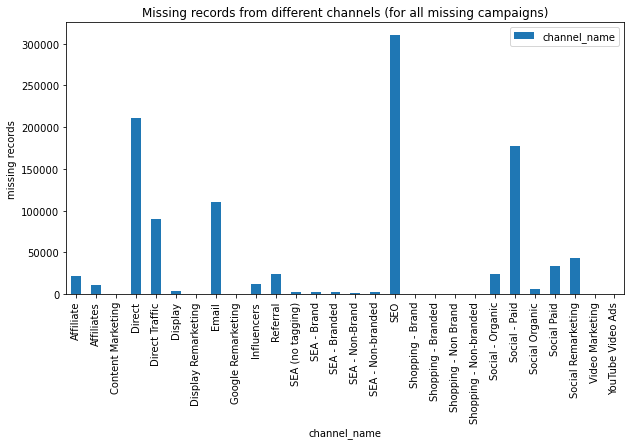

In [23]:
missing_campaigns.groupby("channel_name").agg({'channel_name':'count'}).plot(kind = 'bar', figsize=(10, 5))
plt.ylabel("missing records")
plt.title("Missing records from different channels (for all missing campaigns)")

In [24]:
# some campaigns have more than one campaign names
session_camp_name = session_sources.groupby(['campaign_id','campaign_name']).agg({'session_id':'count'})

In [25]:
session_camp_name

session_id
campaign_id    campaign_name                
campaign_id_1  campaign_name_203           6
               campaign_name_741          66
campaign_id_10 campaign_name_13           10
               campaign_name_203          22
               campaign_name_741        8133
...                                      ...
notset         campaign_name_995           7
               campaign_name_996        4863
               campaign_name_997           3
               campaign_name_998           4
               campaign_name_999           2

[1382 rows x 1 columns]

In [26]:
session_camp_name.query("campaign_id =='notset'")

session_id
campaign_id campaign_name                 
notset      campaign_name_1              7
            campaign_name_10         34438
            campaign_name_100            3
            campaign_name_1000           1
            campaign_name_1001           1
...                                    ...
            campaign_name_995            7
            campaign_name_996         4863
            campaign_name_997            3
            campaign_name_998            4
            campaign_name_999            2

[1168 rows x 1 columns]

Now we will look at if the costs are fully covered or not. For this, we calculate the costs perclick for api_adwords and then compare it with the session costs.

In [27]:
#cost perclick for api_word_cost
api_word_cost['cpc_awc']= api_word_cost['cost']/api_word_cost['clicks']

In [28]:
api_word_cost.query("clicks==0")

,event_date,campaign_id,cost,clicks,cpc_awc
2302,2021-07-02,campaign_id_156,7.031,0,inf
2309,2021-07-17,campaign_id_94,6.975,0,inf
2410,2021-07-11,campaign_id_94,5.976,0,inf
2595,2021-07-04,campaign_id_94,3.908,0,inf
2603,2021-07-05,campaign_id_156,3.816,0,inf
2640,2021-07-10,campaign_id_94,3.458,0,inf
2795,2021-07-01,campaign_id_7,1.844,0,inf
2862,2021-07-20,campaign_id_94,1.368,0,inf
2889,2021-07-09,campaign_id_7,1.108,0,inf
2894,2021-07-20,campaign_id_7,1.067,0,inf


So assuming that no costs paid for 0 clicks and making their costs per clicks as 0 (instead of infinite)

In [29]:
api_word_cost.replace(np.inf, 0, inplace=True)

In [30]:
api_word_cost.query("clicks==0")

,event_date,campaign_id,cost,clicks,cpc_awc
2302,2021-07-02,campaign_id_156,7.031,0,0.0
2309,2021-07-17,campaign_id_94,6.975,0,0.0
2410,2021-07-11,campaign_id_94,5.976,0,0.0
2595,2021-07-04,campaign_id_94,3.908,0,0.0
2603,2021-07-05,campaign_id_156,3.816,0,0.0
2640,2021-07-10,campaign_id_94,3.458,0,0.0
2795,2021-07-01,campaign_id_7,1.844,0,0.0
2862,2021-07-20,campaign_id_94,1.368,0,0.0
2889,2021-07-09,campaign_id_7,1.108,0,0.0
2894,2021-07-20,campaign_id_7,1.067,0,0.0


In [31]:
# grouping all the campagins together and summing the cost for that particular campaign in both api_adwords_costs and session_sources costs
api_cost = api_word_cost.groupby('campaign_id').agg({'cpc_awc':'sum'}).reset_index()
session_cost = session_sources.groupby(['campaign_id']).agg({'cpc':'sum'}).reset_index()

After looking that there is some cpc generated from the campaigns whose id are notset, we can not remove them.

In [32]:
print(api_cost.shape)
print(session_cost.shape)

(109, 2)
(164, 2)


The campaign_id's from both the table should come same but there is some issue.

In [33]:
# let's merge both tables to see the difference between both cost w.r.t campaign_id
costs_tab =  api_cost.merge(session_cost, how='right', on='campaign_id')

In [34]:
costs_tab.head(2)

,campaign_id,cpc_awc,cpc
0,campaign_id_1,NaN,1.144
1,campaign_id_10,28.492615,6833.461


In [35]:
# difference bwtween the costs
costs_tab['cost_diff']= costs_tab['cpc']-costs_tab['cpc_awc']

In [36]:
costs_tab.head(2)

,campaign_id,cpc_awc,cpc,cost_diff
0,campaign_id_1,NaN,1.144,NaN
1,campaign_id_10,28.492615,6833.461,6804.968385


In [37]:
costs_tab.describe()

,cpc_awc,cpc,cost_diff
count,107.000000,164.000000,107.000000
mean,28.993869,4148.012006,4106.083972
std,21.729930,19660.146872,8376.069972
min,0.560650,0.000000,-24.974833
25%,16.042170,0.000000,224.956798
50%,24.396861,245.228500,884.282087
75%,35.064177,1873.338750,4708.813745
max,141.791919,237814.424000,62117.010620


<AxesSubplot:>

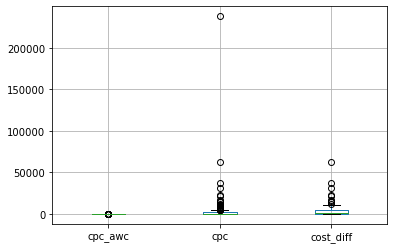

In [38]:
costs_tab.boxplot()

Seems like there is an outlier, for now we are not removing them because there are some campaigns which have no campaign ids but are generating revenues. Also, our main focus is to see which campaigns are underperforming , therefore this outlier will have no impact on our analysis.  

In [39]:
costs_tab.isna().sum()

campaign_id     0
cpc_awc        57
cpc             0
cost_diff      57
dtype: int64

There are 57 campaign_ids for which there is either no click happened or no data recorded.

In [40]:
costs_tab

,campaign_id,cpc_awc,cpc,cost_diff
0,campaign_id_1,NaN,1.144,NaN
1,campaign_id_10,28.492615,6833.461,6804.968385
2,campaign_id_100,19.028347,313.633,294.604653
3,campaign_id_101,16.935824,117.070,100.134176
4,campaign_id_102,NaN,0.000,NaN
...,...,...,...,...
159,campaign_id_95,27.661667,72.280,44.618333
160,campaign_id_96,77.128198,305.028,227.899802
161,campaign_id_98,NaN,0.000,NaN
162,campaign_id_99,12.464064,677.328,664.863936


In [41]:
# checking in percent
costs_tab['cost_diff_pct']=(costs_tab['cost_diff']/costs_tab['cpc'])*100

Let's see if there is any particular channel.

In [42]:
#underperforming campaigns
costs_tab.loc[(costs_tab['cost_diff'] <=0) ]

,campaign_id,cpc_awc,cpc,cost_diff,cost_diff_pct
142,campaign_id_79,15.557979,0.00,-15.557979,-inf
158,campaign_id_94,65.714833,40.74,-24.974833,-61.302978


 We will have closer look to campaign_id_79 and campaign_id_94 and see 
 - What names are under them?
 - Which channels are not a good source for these campaigns?
 - Which market is not better for the campaigns?
 - Which time is not suitable for these campaigns to get more clicks?

In [43]:
def digging_campaigns(campaign_id):
    c_name = session_sources.loc[(session_sources['campaign_id'] ==f'{campaign_id}') ]
    print( f'The campaign names in the {campaign_id} are\n{c_name.campaign_name.value_counts()}')
    camp_channel = c_name.channel_name.value_counts()
    print(f'\nThe campaign channels in the {campaign_id} are\n{camp_channel}')
    plot = c_name.groupby("event_time").agg({'event_time':'count'}).plot(figsize=(10, 5))
    plt.title("Time when sessions are not clicked")
    print(f'\nThe campaign markets in the {campaign_id} are\n{c_name.market.value_counts()}')
    camp_users = c_name.groupby('user_id').agg({'session_id':'count'}).sort_values('session_id', ascending = False).reset_index().head(10)
    print(f'\nThe top 10 users who have more than one session on {campaign_id} \n{camp_users}')
    return(plot)
    

The campaign names in the campaign_id_79 are
campaign_name_741     20363
campaign_name_349       464
campaign_name_711        94
campaign_name_593         3
campaign_name_1119        2
campaign_name_578         1
Name: campaign_name, dtype: int64

The campaign channels in the campaign_id_79 are
Shopping - Non-branded    20914
SEO                          11
SEA - Non-Brand               2
Name: channel_name, dtype: int64

The campaign markets in the campaign_id_79 are
NL    20921
GB        4
DE        2
Name: market, dtype: int64

The top 10 users who have more than one session on campaign_id_79 
          user_id  session_id
0  user_id_288609          27
1  user_id_967060          27
2  user_id_536445          26
3  user_id_462034          25
4  user_id_920082          23
5  user_id_536245          22
6  user_id_227812          22
7  user_id_227794          19
8  user_id_751065          19
9  user_id_848973          19


<AxesSubplot:title={'center':'Time when sessions are not clicked'}, xlabel='event_time'>

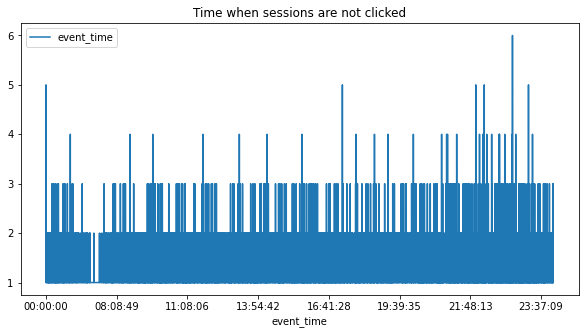

In [44]:
digging_campaigns('campaign_id_79')

In [45]:
#c_79.loc[(c_79['channel_name'] =='Shopping - Non-branded') ]

The campaign names in the campaign_id_94 are
campaign_name_741    21
Name: campaign_name, dtype: int64

The campaign channels in the campaign_id_94 are
Video Marketing    21
Name: channel_name, dtype: int64

The campaign markets in the campaign_id_94 are
DE    21
Name: market, dtype: int64

The top 10 users who have more than one session on campaign_id_94 
           user_id  session_id
0   user_id_357166           2
1  user_id_1036174           1
2   user_id_471984           1
3   user_id_866276           1
4   user_id_864143           1
5   user_id_842566           1
6   user_id_759755           1
7   user_id_654419           1
8   user_id_618766           1
9   user_id_594310           1


<AxesSubplot:title={'center':'Time when sessions are not clicked'}, xlabel='event_time'>

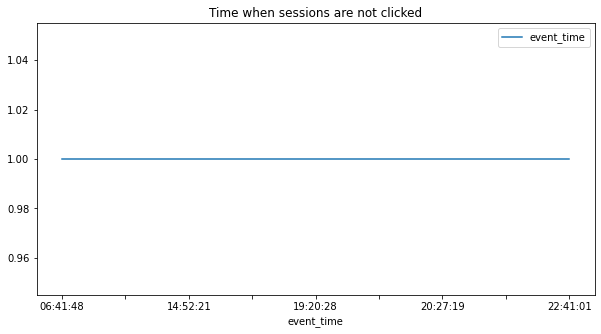

In [46]:
digging_campaigns('campaign_id_94')

Assuming that NAN cost per click for ad_word_costs could be due to no collection of data because costs per click for sessions is also 0 for these campaigns.

In [47]:
cpc_no_profit = costs_tab.loc[(costs_tab['cpc'])<=0]
cpc_no_profit

,campaign_id,cpc_awc,cpc,cost_diff,cost_diff_pct
4,campaign_id_102,NaN,0.0,NaN,NaN
6,campaign_id_104,NaN,0.0,NaN,NaN
7,campaign_id_105,NaN,0.0,NaN,NaN
10,campaign_id_108,NaN,0.0,NaN,NaN
11,campaign_id_109,NaN,0.0,NaN,NaN
12,campaign_id_11,NaN,0.0,NaN,NaN
15,campaign_id_112,NaN,0.0,NaN,NaN
18,campaign_id_115,NaN,0.0,NaN,NaN
20,campaign_id_117,NaN,0.0,NaN,NaN
22,campaign_id_119,NaN,0.0,NaN,NaN


In [48]:
cpc_no_profit.shape

(52, 5)

In [49]:
(len(cpc_no_profit)/len(costs_tab))*100

31.70731707317073

removing the campaigns with 0 costs per clicks that is 31% of data

In [50]:
new_costs = costs_tab.loc[(costs_tab['cpc'])>0]

In [51]:
# filling missing values in cost difference  with cpc because this is the costs we got after the clickhappened on site
new_costs['cost_diff'] = new_costs.apply(lambda row: row['cpc'] if np.isnan(row['cost_diff']) else row['cost_diff'],axis=1)

In [52]:
new_costs['cost_diff_pct']=(new_costs['cost_diff']/new_costs['cpc'])*100

In [53]:
new_costs['cost_diff_pct']=(new_costs['cost_diff']/new_costs['cpc'])*100

In [54]:
new_costs = new_costs.sort_values('cost_diff_pct', ascending = False)

querying the campaigns which recovered 99% and above costs

In [55]:
new_costs.query('cost_diff_pct >= 99').head(10)

,campaign_id,cpc_awc,cpc,cost_diff,cost_diff_pct
0,campaign_id_1,NaN,1.144,1.144000,100.000000
59,campaign_id_153,NaN,0.843,0.843000,100.000000
149,campaign_id_85,NaN,0.172,0.172000,100.000000
145,campaign_id_81,NaN,2.336,2.336000,100.000000
98,campaign_id_39,NaN,1.721,1.721000,100.000000
163,notset,NaN,237814.424,237814.424000,100.000000
54,campaign_id_149,21.263380,62138.274,62117.010620,99.965781
29,campaign_id_126,22.556390,30876.030,30853.473610,99.926945
117,campaign_id_56,12.567506,17167.419,17154.851494,99.926794
112,campaign_id_51,9.455993,10320.445,10310.989007,99.908376


So, from the above analysis we can see that 41 campaigns of the total 164 campaigns have covered the costs 99% and above. There are 52 campaigns that is 31% of all the campaigns which either have no information or there is no costs have been collected. campaign_id_79 and 94 are underperforming campaigns,therefore, something should be changed in them.


# 2.  Are the conversions in the 'conversions' table stable over time? Any pattern?

Text(0, 0.5, 'conversion count')

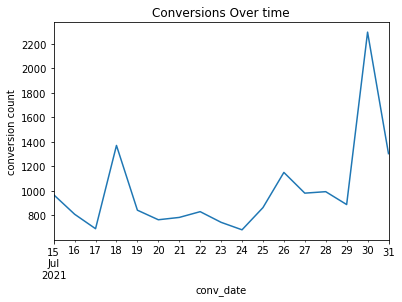

In [56]:
# counting the conversions on respective dates
conv = conversions.groupby('conv_date').agg({'conv_id':'count'})
conv['conv_id'].plot()
plt.title("Conversions Over time")
plt.ylabel('conversion count')

<AxesSubplot:>

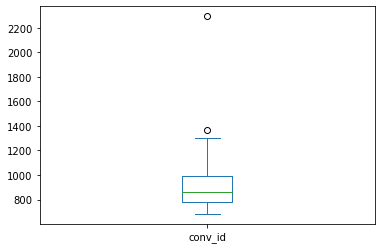

In [57]:
#Let's look at the outliers
conv.plot.box()

In [58]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [59]:
find_outliers_IQR(conv)

,conv_id
conv_date,
2021-07-15,NaN
2021-07-16,NaN
2021-07-17,NaN
2021-07-18,1370.0
2021-07-19,NaN
2021-07-20,NaN
2021-07-21,NaN
2021-07-22,NaN
2021-07-23,NaN


In [60]:
conversions.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16949    False
16950    False
16951    False
16952    False
16953    False
Length: 16954, dtype: bool

So there seem to be outliers value on 18th and 30th July. We will see if the conversion_id is getting repeated in our table.

In [61]:
conversions.conv_id.value_counts()

conv_id_291      2
conv_id_11991    2
conv_id_159      2
conv_id_6545     2
conv_id_843      2
                ..
conv_id_12911    1
conv_id_8619     1
conv_id_160      1
conv_id_12312    1
conv_id_4646     1
Name: conv_id, Length: 16938, dtype: int64

Given that the conversion_ids for each purchase should be unique.We can check if the data is same in the repeating conv_id

In [62]:
conversions_ = conversions.copy()

In [63]:
#conversions_

In [64]:
# conversion_ids which are repeated in the table
conversions_[conversions_['conv_id'].isin(conversions_['conv_id'].value_counts()[conversions_['conv_id'].value_counts()>1].index)].conv_id.head()


21      conv_id_16249
173     conv_id_16016
1219      conv_id_159
2533    conv_id_15447
3782    conv_id_16550
Name: conv_id, dtype: object

In [65]:
conversions.query("conv_id=='conv_id_16249'")

,conv_id,user_id,conv_date,market,revenue
21,conv_id_16249,user_id_411752,2021-07-15,AT,161.35
16938,conv_id_16249,user_id_182167,2021-07-15,AT,161.35


In [66]:
conversions.query("conv_id=='conv_id_159'")

,conv_id,user_id,conv_date,market,revenue
1219,conv_id_159,user_id_95063,2021-07-16,DE,100.83
16940,conv_id_159,user_id_26171,2021-07-16,DE,100.83


In [67]:
conversions.query("conv_id=='conv_id_11991'")

,conv_id,user_id,conv_date,market,revenue
12343,conv_id_11991,user_id_8521,2021-07-28,GB,70.72
16948,conv_id_11991,user_id_1111998,2021-07-28,GB,70.72


Though there is unique conversion_id but we have different users on same conversion id with same data, it might be because same conversions have been tracked differently. We can also compare it with conversions at backend and see that the same conversion id is tracked for different users.

In [68]:
# we can also compare it with conversions at backend and see that the same conversion id is tracked for different users.
conv_back.query("conv_id=='conv_id_11991'")

,conv_id,user_id,conv_date,market,revenue
12596,conv_id_11991,user_id_8521,2021-07-28,GB,70.72


In [69]:
#let's fix the data discrepency and only select the first transanction
conversions_new =  conversions.drop_duplicates(subset='conv_id', keep="first",inplace=False)

In [70]:
conversions_new.shape

(16938, 5)

In [71]:
conversions_.shape

(16954, 5)

Text(0, 0.5, 'conversion count')

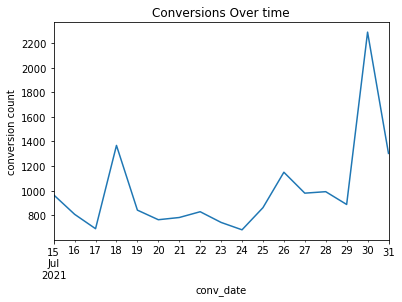

In [72]:
#let's plot again 
conv_new = conversions_new.groupby('conv_date').agg({'conv_id':'count'})
conv_new['conv_id'].plot()
plt.title("Conversions Over time")
plt.ylabel('conversion count')

From the above 2 graphs, it is evident that the conversion and the conversion change was **high at the end of the month and on 18th of July**. It can also be worth noting that although the conversions on 24th of July was decreased but the percent change of the conversion as compared to previous days was not so down.

In [73]:
#conv_days.loc[conv_days['conv_date'] == '2021-07-31']

To see the trend more closely, we will check the trend on weekdays.

# Based on weekdays


In [74]:
# preperation of dataframe to extract weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
conversions_new['weekdays']=conversions_new['conv_date'].dt.strftime('%A')
#
conv_days = conversions_new.groupby(['conv_date','weekdays']).agg({'conv_id':'count'}).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday'),
  Text(7, 0, 'Thursday'),
  Text(8, 0, 'Friday'),
  Text(9, 0, 'Saturday'),
  Text(10, 0, 'Sunday'),
  Text(11, 0, 'Monday'),
  Text(12, 0, 'Tuesday'),
  Text(13, 0, 'Wednesday'),
  Text(14, 0, 'Thursday'),
  Text(15, 0, 'Friday'),
  Text(16, 0, 'Saturday')])

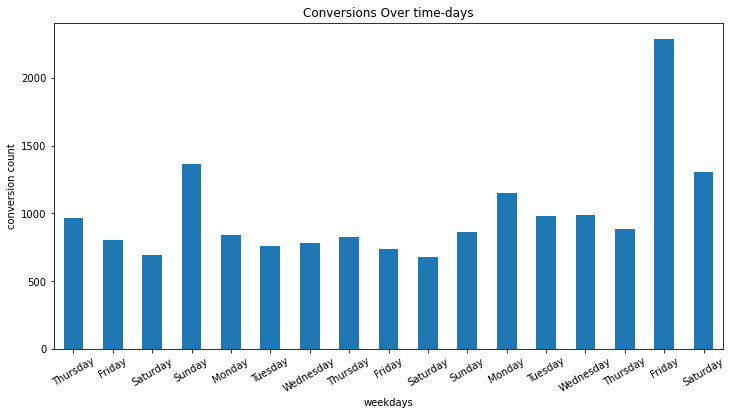

In [75]:
conv1 = conv_days.set_index('weekdays')
conv1['conv_id'].plot(kind = 'bar', figsize=(12,6))
plt.title("Conversions Over time-days")
plt.ylabel('conversion count')
plt.xticks(rotation = 30)

The above graph shows the trend that on **Saturdays the converion is lower** from Friday and Sunday. Moreover, the conversion on **Sunday is higher than on Friday**. On Tuesday and Wednesday conversion is almost similar.

Text(0, 0.5, 'conversion count')

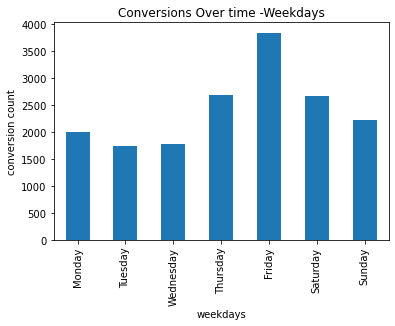

In [76]:
conv_week = conversions_new.groupby('weekdays').agg({'conv_id':'count'}).reindex(labels=weekdays)
conv_week['conv_id'].plot(kind = 'bar')
plt.title("Conversions Over time -Weekdays")
plt.ylabel('conversion count')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

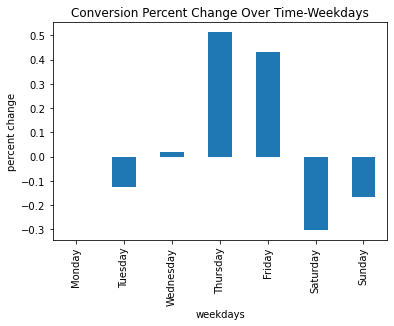

In [77]:
conv_week['conv_id_pct_change'] = conv_week['conv_id'].pct_change()
conv_week['conv_id_pct_change'].plot(kind = 'bar')
plt.title('Conversion Percent Change Over Time-Weekdays')
plt.ylabel("percent change")
plt.xticks(rotation = 90)

From the above analysis we can conclude that the conversion changes overtime and is not stable. It can be depicted the on  Friday conversion is high as compared to other weekdays. **With more information and data we can know how is the trend changes on Sunday, may be the conversions on sundays are more than Friday.**

# Double check conversions ('conversions' table) with backend ('conversions_backend' table), any issues?

In [78]:
conv_back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17283 entries, 0 to 17282
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   conv_id    17283 non-null  object        
 1   user_id    17283 non-null  object        
 2   conv_date  17283 non-null  datetime64[ns]
 3   market     17283 non-null  object        
 4   revenue    17283 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 675.2+ KB


In [79]:
conversions_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16938 entries, 0 to 16937
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   conv_id    16938 non-null  object        
 1   user_id    16938 non-null  object        
 2   conv_date  16938 non-null  datetime64[ns]
 3   market     16938 non-null  object        
 4   revenue    16938 non-null  float64       
 5   weekdays   16938 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 926.3+ KB


In [80]:
conversions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16954 entries, 0 to 16953
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   conv_id    16954 non-null  object        
 1   user_id    16954 non-null  object        
 2   conv_date  16954 non-null  datetime64[ns]
 3   market     16954 non-null  object        
 4   revenue    16954 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 662.4+ KB


Some values are not recorded in conversions table as in conversions_backend table. Also, from the above analysis, it is seen that the same data in conversion table might got repeated as for 2 different users.

In [81]:
print(conversions_new['revenue'].sum())
print(conv_back['revenue'].sum())

847927.35
877250.86


From, the above exploration of data it can be clearly seen that there are missing values in the conversions tables as compared to conversions_backend table(which is considered true). This is also showing the difference between the revenue generated.

In [82]:
# matching conv_id from both tables
(conversions
    .assign(check_conv_id = conversions['conv_id'].isin(conv_back['conv_id']))
    .query("check_conv_id==False"))

,conv_id,user_id,conv_date,market,revenue,check_conv_id


In [83]:
# now let's check for the other table
missed_conversions = (conv_back
    .assign(check_conv_id = conv_back['conv_id'].isin(conversions_new['conv_id']))
    .query("check_conv_id==False"))

We have found 345 conv_id missing from conversions table.

In [84]:
conv_back['conv_date'].min()

Timestamp('2021-07-15 00:00:00')

In [85]:
conversions['conv_date'].min()

Timestamp('2021-07-15 00:00:00')

In [86]:
# how many a times user was not detected
missed_conversions.user_id.value_counts()

user_id_547739    2
user_id_854426    2
user_id_761755    1
user_id_699146    1
user_id_519790    1
                 ..
user_id_330296    1
user_id_607544    1
user_id_528202    1
user_id_333379    1
user_id_594900    1
Name: user_id, Length: 343, dtype: int64

In [87]:
#market
missed_conversions.market.value_counts()

GB    124
NL    103
DE     74
FR     16
BE      8
AT      7
DK      4
SE      3
IE      2
ES      1
LT      1
IT      1
SK      1
Name: market, dtype: int64

Text(0.5, 1.0, 'Missed Conversions by Date')

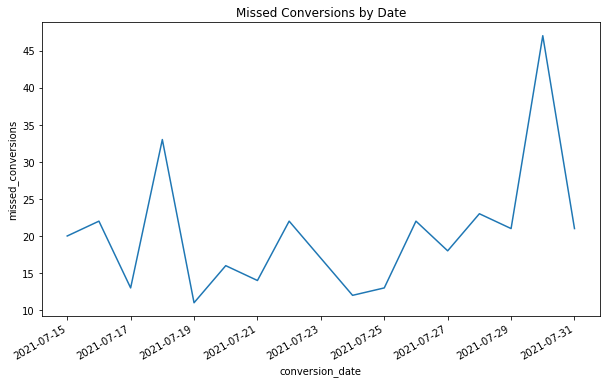

In [88]:
missed_conversions.conv_date.value_counts().plot(figsize=(10,6))
plt.xlabel('conversion_date')
plt.ylabel('missed_conversions')
plt.title('Missed Conversions by Date')

Let's compare the user_id's from both conversion table, so we can see that is the missing values is from particular user or not.

In [89]:
missing_users = (missed_conversions
    .assign(check_user_id = missed_conversions['user_id'].isin(conversions['user_id']))
    .query("check_user_id==False"))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'GB'),
  Text(1, 0, 'NL'),
  Text(2, 0, 'DE'),
  Text(3, 0, 'FR'),
  Text(4, 0, 'BE'),
  Text(5, 0, 'AT'),
  Text(6, 0, 'DK'),
  Text(7, 0, 'SE'),
  Text(8, 0, 'IE'),
  Text(9, 0, 'ES'),
  Text(10, 0, 'LT'),
  Text(11, 0, 'IT'),
  Text(12, 0, 'SK')])

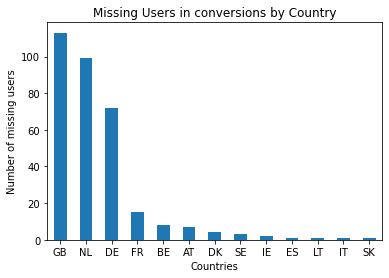

In [90]:
missing_users.market.value_counts().plot(kind='bar')
plt.title('Missing Users in conversions by Country')
plt.xlabel('Countries')
plt.ylabel('Number of missing users')
plt.xticks(rotation = 360)


# Are attribution results consistent? Do you find any conversions where the 'ihc' values don't make sense?

First lets find out the ihc value by taking the sum of sessions for each conversion id.

In [91]:
attri_jour.head(1)

,conv_id,session_id,ihc
0,conv_id_12119,session_id_180406,0.0


In [92]:
attri_jour.shape

(22499, 3)

In [93]:
ihc_values = attri_jour.groupby(["conv_id","session_id"]).agg({'ihc':'sum'}).sort_values('ihc', ascending = False)

In [94]:
#attri_jour.conv_id.value_counts()

In [95]:
ihc_values.describe()

,ihc
count,22499.000000
mean,0.309004
std,0.329172
min,0.000000
25%,0.024287
50%,0.194419
75%,0.499821
max,1.000000


Here, we see there are some ihc values which doesnot make any sense because  ihc value should be  1, but from above table we see some values are more or less than 1 for each session.

In [96]:
ihc_values['ihc'] = ihc_values.ihc.round(2)
ihc_values.loc[(ihc_values['ihc'] !=1)]


ihc
conv_id       session_id              
conv_id_3576  session_id_600494   0.83
conv_id_10756 session_id_63634    0.83
conv_id_15138 session_id_1271698  0.83
conv_id_14006 session_id_532527   0.83
conv_id_7211  session_id_529990   0.83
...                                ...
conv_id_7156  session_id_741151   0.00
              session_id_627655   0.00
conv_id_3028  session_id_653693   0.00
              session_id_67301    0.00
conv_id_7676  session_id_459220   0.00

[19434 rows x 1 columns]

In [97]:
ihc_values['ihc'].value_counts()

0.00    4969
1.00    3065
0.33    1866
0.50    1610
0.17     955
        ... 
0.82       3
0.69       2
0.81       1
0.73       1
0.75       1
Name: ihc, Length: 79, dtype: int64


# (Bonus) Do we have an issue with channeling? Are the number of sessions per channel stable over time?

In [98]:
# let's look at the number of channels we have
session_sources.channel_name.unique()

array(['Affiliate', 'Affiliates', 'Content Marketing', 'Direct',
       'Direct Traffic', 'Display', 'Display Remarketing', 'Email',
       'Google Remarketing', 'Influencers', 'Referral',
       'SEA (no tagging)', 'SEA - Brand', 'SEA - Branded',
       'SEA - Non-Brand', 'SEA - Non-branded', 'SEO', 'Shopping - Brand',
       'Shopping - Branded', 'Shopping - Non Brand',
       'Shopping - Non-branded', 'Social - Organic', 'Social - Paid',
       'Social Organic', 'Social Paid', 'Social Remarketing',
       'Video Marketing', 'YouTube Video Ads'], dtype=object)

In [99]:
session_sources.channel_name.unique().size

28

We have 28 different channels for our marketing.

Seems like there are lot of channels that are with different names such as Affiliate and Affiliates, Direct and Direct Traffic etc. Therefore we can tweak the names of channels.

In [100]:
session_channels = session_sources.copy()

In [101]:
# replacing the channel names
session_channels['channel_name']=session_channels['channel_name'].str.replace('Affiliate', 'Affiliates')
session_channels['channel_name']=session_channels['channel_name'].str.replace('Affiliatess', 'Affiliates')
session_channels['channel_name']=session_channels['channel_name'].str.replace('Direct Traffic', 'Direct')
session_channels['channel_name']=session_channels['channel_name'].str.replace('Display Remarketing', 'Display')
session_channels['channel_name']=session_channels['channel_name'].str.replace('SEA - Branded', 'SEA - Brand')
session_channels['channel_name']=session_channels['channel_name'].str.replace('SEA - Non-branded', 'SEA - Non-Brand')
session_channels['channel_name']=session_channels['channel_name'].str.replace('Shopping - Branded', 'Shopping - Brand')
session_channels['channel_name']=session_channels['channel_name'].str.replace('Shopping - Non-branded', 'Shopping - Non Brand')
session_channels['channel_name']=session_channels['channel_name'].str.replace('Social - Organic', 'Social Organic')
session_channels['channel_name']=session_channels['channel_name'].str.replace('Social - Paid', 'Social Paid')

In [102]:
session_channel = session_channels.groupby(['event_date', 'channel_name']).agg({'session_id':'count'}).sort_values(['event_date','session_id'], ascending = True).reset_index()

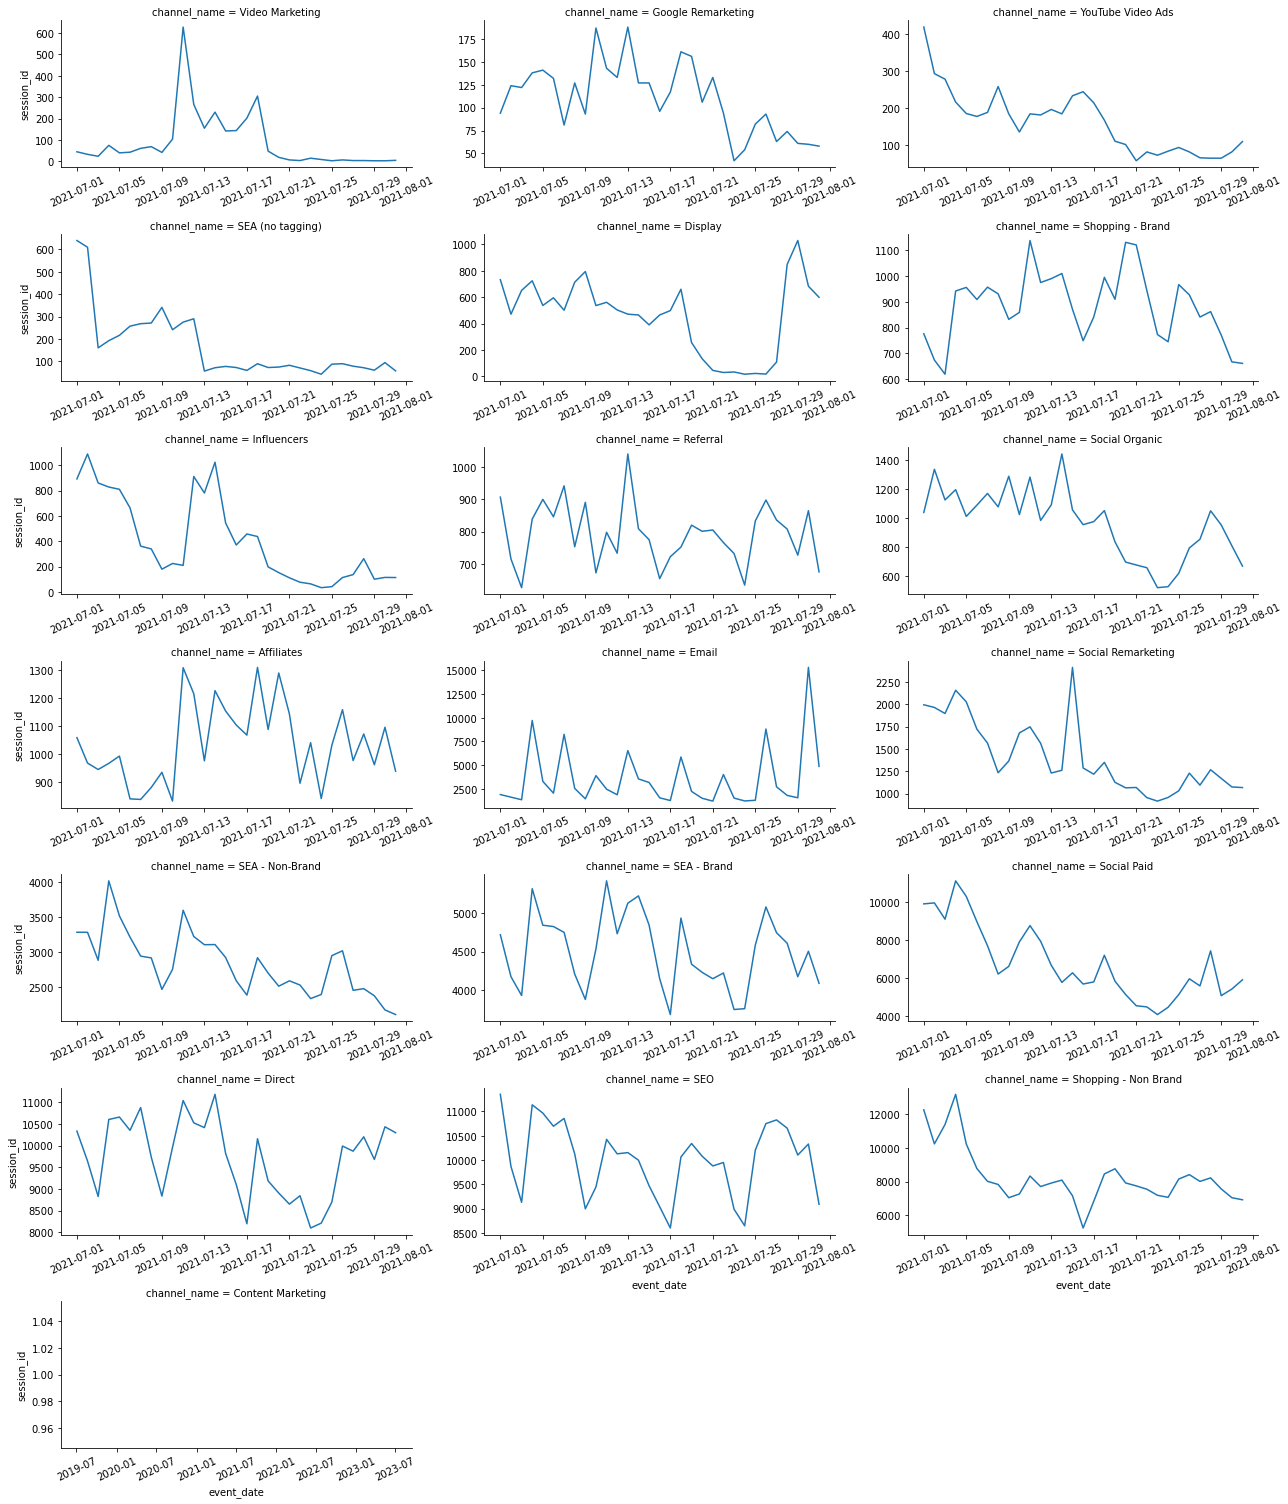

In [103]:
g = sns.FacetGrid(session_channel, col='channel_name', sharex=False, sharey=False, col_wrap=3, height=3, aspect=2)
g.map_dataframe(sns.lineplot, x='event_date', y='session_id')
g.set_xticklabels(rotation = 25)
g.fig.tight_layout()


From the above plots we can detect that from several channels such as **Video marketing, Google remarketing, YouTube Ads, Shopping Brand, Influencers, Referal, Social organic, Affiliates, Social Remarketing, SEA and Direct** was increased between 9th July and 13 July. In addition, the trend is somehow decreasing in these channels (except Direct and SEA-Brand) at the end of the month while the trend is increasing from **E-mail and SEO** at the end of the month. Overall, we can not say that the number of sessions from the chanels was stable over the time.

In [104]:
# worse channels for marketing
session_sources.groupby(['channel_name']).agg({'session_id':'count'}).sort_values('session_id', ascending = True).head(5)

,session_id
channel_name,
Content Marketing,1
Display Remarketing,2
Video Marketing,2738
Google Remarketing,3407
YouTube Video Ads,5028


In [105]:
# best marketing channels
session_sources.groupby(['channel_name']).agg({'session_id':'count'}).sort_values('session_id', ascending = False).head(5)

,session_id
channel_name,
SEO,310277
Direct,211362
Shopping - Non-branded,205366
Social - Paid,177264
Email,110181


In [106]:
# best marketing channels
chanels_s = session_sources.groupby(['channel_name']).agg({'session_id':'count'}).sort_values('session_id', ascending = False)

Text(0.5, 1.0, 'Session counts on all channel')

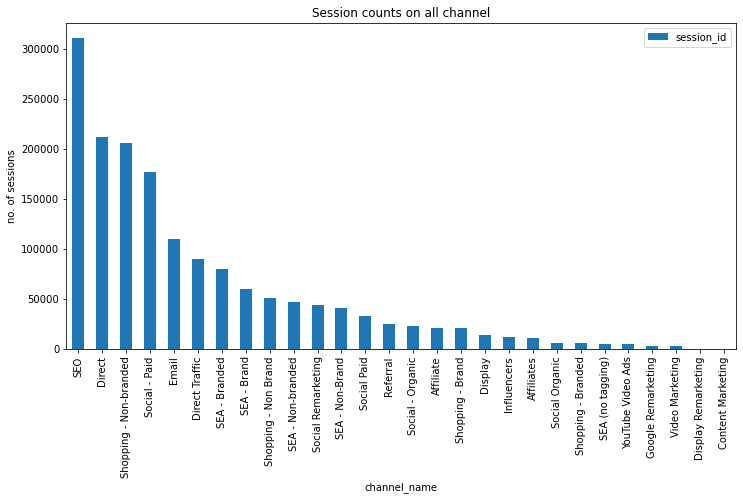

In [107]:
chanels_s.plot(kind = 'bar',figsize=(12,6) )
plt.ylabel('no. of sessions')

plt.title('Session counts on all channel')

Text(0.5, 1.0, 'Session counts on channel -(after data cleaning)')

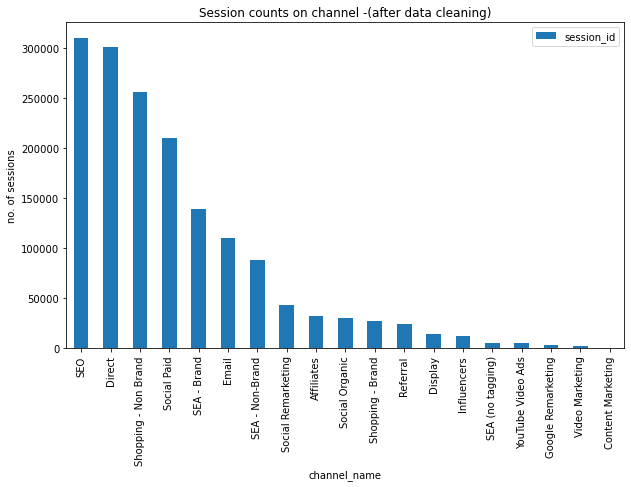

In [108]:
# best marketing channels (with changed_names)
sc = session_channels.groupby(['channel_name']).agg({'session_id':'count'}).sort_values('session_id', ascending = False)
sc.plot(kind = 'bar',figsize=(10,6))
plt.ylabel('no. of sessions')

plt.title('Session counts on channel -(after data cleaning)')

So from the graphs above we can see that there are no visits on channels **Display marketing** and **Content marketing**. Whereas SEO is the most popular channel among all the other channels.

# (Bonus) Any other issues?

In [109]:
conversions.query('revenue < =0')

,conv_id,user_id,conv_date,market,revenue
7,conv_id_11478,user_id_758246,2021-07-15,DE,0.0
10,conv_id_87,user_id_376090,2021-07-15,FR,0.0
151,conv_id_15098,user_id_47785,2021-07-15,NL,0.0
162,conv_id_16021,user_id_173269,2021-07-15,DE,0.0
163,conv_id_12754,user_id_561494,2021-07-15,DE,0.0
...,...,...,...,...,...
16644,conv_id_7159,user_id_28518,2021-07-31,GB,0.0
16660,conv_id_9775,user_id_20418,2021-07-31,GB,0.0
16722,conv_id_14959,user_id_591188,2021-07-31,GB,0.0
16752,conv_id_15526,user_id_711735,2021-07-31,GB,0.0


In [110]:
print(conversions.query('revenue <=0').shape)
print(conv_back.query('revenue <=0').shape)

(197, 5)
(27, 5)


Considering conversion means that a user with certain conv_id made purchase. So assuming that for each conversion id there should be some revenue collected. However, when we see both conversions table, we have genertaed 0 revenue from certain conv_ids This could be because of the following reason:
1. There is a coupon or discount code which is applied at the checkout.
2. The price of some items are free (like some free e-books, free-trials etc).

By looking at the above points we can not conclude anything, because there is no enough information about the products sold by the Company X.

Moreover, if the conversions at the backend are true and we have same conversion ids in both conversion tables(some missing values in conversion_front), then the number of conversion_id with the 0 revenue generated would be the same. However, the conversion at frontend has not properly tracked the revenue and there is a difference of 170 untracked ids. 